In [100]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score,classification_report

In [101]:
test_data = pd.read_csv("risk_analytics_test.csv", index_col=0)
train_data = pd.read_csv("risk_analytics_train.csv", index_col=0)
test_data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
Loan_ID,,,,,,,,,,,
LP001015,Male,Yes,0.0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
LP001022,Male,Yes,1.0,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
LP001031,Male,Yes,2.0,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
LP001035,Male,Yes,2.0,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
LP001051,Male,No,0.0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [102]:
train_data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [103]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 614 entries, LP001002 to LP002990
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    float64
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(5), int64(1), object(6)
memory usage: 62.4+ KB


In [104]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 367 entries, LP001015 to LP002989
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             356 non-null    object 
 1   Married            367 non-null    object 
 2   Dependents         357 non-null    float64
 3   Education          367 non-null    object 
 4   Self_Employed      344 non-null    object 
 5   ApplicantIncome    367 non-null    int64  
 6   CoapplicantIncome  367 non-null    int64  
 7   LoanAmount         362 non-null    float64
 8   Loan_Amount_Term   361 non-null    float64
 9   Credit_History     338 non-null    float64
 10  Property_Area      367 non-null    object 
dtypes: float64(4), int64(2), object(5)
memory usage: 34.4+ KB


In [105]:
for col in test_data.columns:
    if train_data[col].dtype!=test_data[col].dtype:
        print(col,train_data[col].dtype,test_data[col].dtype)

CoapplicantIncome float64 int64


In [106]:
train_data.describe()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,599.000000,614.000000,614.000000,592.000000,600.00000,564.000000
mean,0.762938,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,1.015216,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,0.000000,150.000000,0.000000,9.000000,12.00000,0.000000
25%,0.000000,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,0.000000,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,2.000000,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,3.000000,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [107]:
test_data.describe()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,357.000000,367.000000,367.000000,362.000000,361.000000,338.000000
mean,0.829132,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,1.071302,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,0.000000,28.000000,6.000000,0.000000
25%,0.000000,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,0.000000,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,2.000000,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,3.000000,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [108]:
train_data.isna().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [109]:
test_data.isna().sum()

Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [110]:
for col in train_data.columns:
    if col == 'Credit_History':
        continue
    train_data[col].fillna(train_data[col].mode()[0], inplace=True)

for col in test_data.columns:
    if col == 'Credit_History':
        continue
    test_data[col].fillna(test_data[col].mode()[0], inplace=True)

In [111]:
print(train_data.isna().sum())
print(test_data.isna().sum())

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       29
Property_Area         0
dtype: int64


In [112]:
train_data['Credit_History'].fillna(value=0, inplace=True)
test_data['Credit_History'].fillna(value=0, inplace=True)

In [113]:
print(train_data.isna().sum())
print(test_data.isna().sum())

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64


C:\Users\amalp\AppData\Local\Temp\ipykernel_26344\3119725513.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_data.corr(), annot=True)


<Axes: >

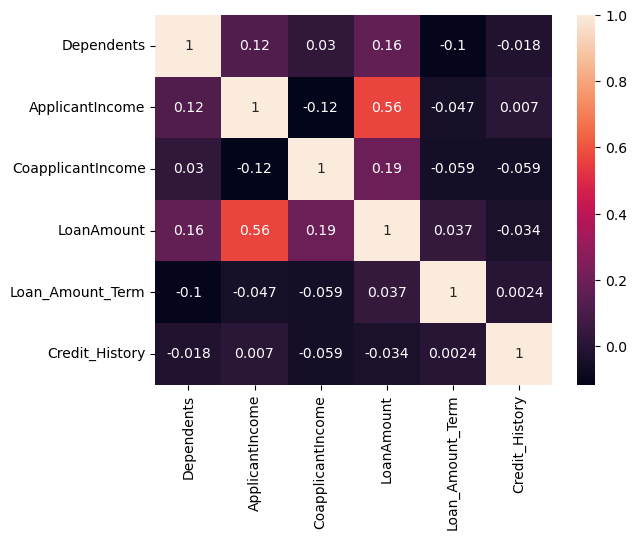

In [114]:
sns.heatmap(train_data.corr(), annot=True)

In [115]:
train_data['Loan_Status'] = train_data['Loan_Status'].map({'Y':1, 'N':0})
train_data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001002,Male,No,0.0,Graduate,No,5849,0.0,120.0,360.0,1.0,Urban,1
LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...
LP002978,Female,No,0.0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,1
LP002979,Male,Yes,3.0,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,1
LP002983,Male,Yes,1.0,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,1


In [116]:
cat_col_train = []
cat_col_test = []
for col in train_data.columns:
    if train_data[col].dtype == 'object':
       cat_col_train.append(col)
for col in test_data.columns:
    if test_data[col].dtype == 'object':
       cat_col_test.append(col)
print(cat_col_train) 
print(cat_col_test) 

['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area']
['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area']


In [117]:
le = LabelEncoder()

for col in cat_col_train:
    train_data[col] = le.fit_transform(train_data[col])
for col in cat_col_test:
    test_data[col] = le.fit_transform(test_data[col])

In [118]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 614 entries, LP001002 to LP002990
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int32  
 1   Married            614 non-null    int32  
 2   Dependents         614 non-null    float64
 3   Education          614 non-null    int32  
 4   Self_Employed      614 non-null    int32  
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    int32  
 11  Loan_Status        614 non-null    int64  
dtypes: float64(5), int32(5), int64(2)
memory usage: 50.4+ KB


In [99]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 367 entries, LP001015 to LP002989
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             367 non-null    int32  
 1   Married            367 non-null    int32  
 2   Dependents         367 non-null    float64
 3   Education          367 non-null    int32  
 4   Self_Employed      367 non-null    int32  
 5   ApplicantIncome    367 non-null    int64  
 6   CoapplicantIncome  367 non-null    int64  
 7   LoanAmount         367 non-null    float64
 8   Loan_Amount_Term   367 non-null    float64
 9   Credit_History     367 non-null    float64
 10  Property_Area      367 non-null    int32  
dtypes: float64(4), int32(5), int64(2)
memory usage: 27.2+ KB


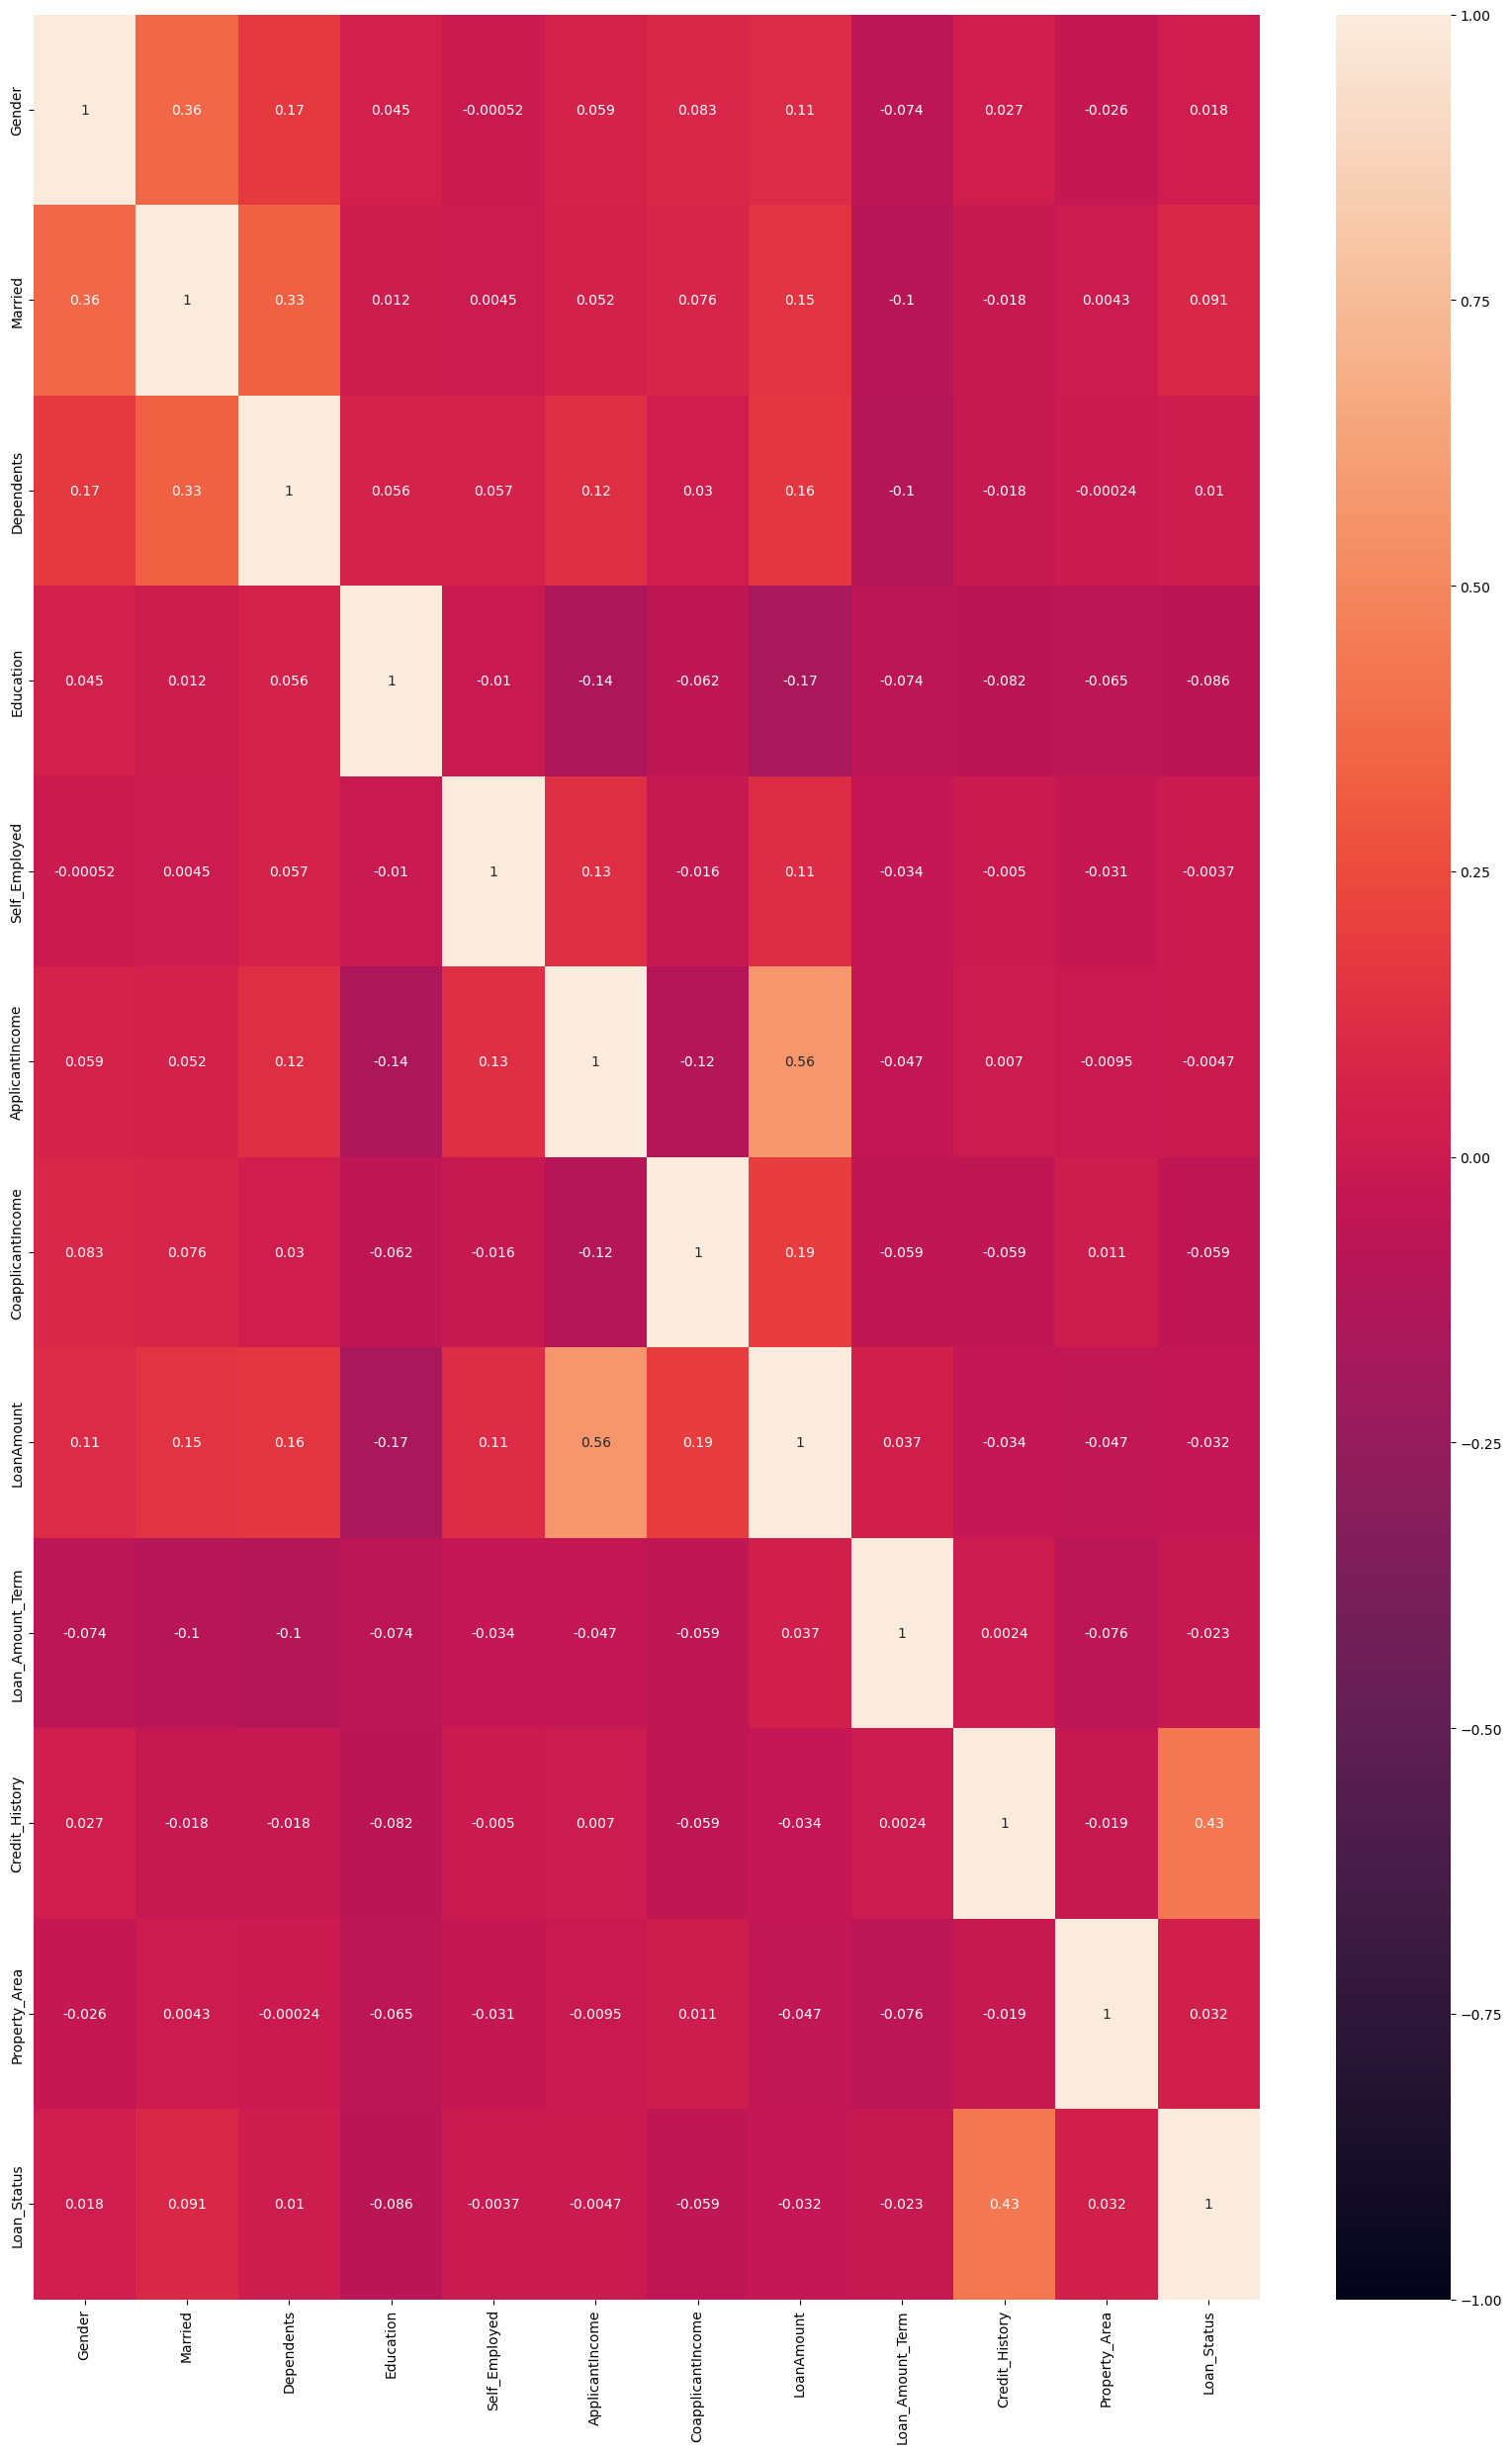

In [119]:
plt.figure(figsize=(20,30))
sns.heatmap(train_data.corr(),vmin=-1.0, vmax=1.0, annot=True)
plt.show()

In [126]:
X_train=train_data.values[:,0:-1]
Y_train=train_data.values[:,-1]
X_test = test_data.values[:,:]
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)

(614, 11)
(614,)
(367, 11)


In [127]:
scaler = StandardScaler()

scaler.fit(X_train)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [128]:
X_train

array([[ 0.47234264, -1.37208932, -0.73780632, ...,  0.2732313 ,
         0.54095432,  1.22329839],
       [ 0.47234264,  0.72881553,  0.25346957, ...,  0.2732313 ,
         0.54095432, -1.31851281],
       [ 0.47234264,  0.72881553, -0.73780632, ...,  0.2732313 ,
         0.54095432,  1.22329839],
       ...,
       [ 0.47234264,  0.72881553,  0.25346957, ...,  0.2732313 ,
         0.54095432,  1.22329839],
       [ 0.47234264,  0.72881553,  1.24474546, ...,  0.2732313 ,
         0.54095432,  1.22329839],
       [-2.11710719, -1.37208932, -0.73780632, ...,  0.2732313 ,
        -1.84858491, -0.04760721]])

In [129]:
X_test

array([[ 0.47234264,  0.72881553, -0.73780632, ...,  0.2732313 ,
         0.54095432,  1.22329839],
       [ 0.47234264,  0.72881553,  0.25346957, ...,  0.2732313 ,
         0.54095432,  1.22329839],
       [ 0.47234264,  0.72881553,  1.24474546, ...,  0.2732313 ,
         0.54095432,  1.22329839],
       ...,
       [ 0.47234264, -1.37208932, -0.73780632, ...,  0.2732313 ,
        -1.84858491, -0.04760721],
       [ 0.47234264,  0.72881553, -0.73780632, ...,  0.2732313 ,
         0.54095432, -1.31851281],
       [ 0.47234264, -1.37208932, -0.73780632, ..., -2.52283563,
         0.54095432, -1.31851281]])

In [131]:
svc = SVC(kernel='rbf', gamma=0.1, C=10)
svc.fit(X_train,Y_train)
Y_pred = svc.predict(X_test)
print(Y_pred)

[1. 1. 1. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1.
 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1.
 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1.
 1. 1. 1. 0. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 0.
 1. 1. 1. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1.
 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 1. 1.
 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1.
 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1.
 0. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0.
 0. 0. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0.
 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1. 0. 1. 0. 1. 0. 1.
 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1.

In [137]:
Y_pred = Y_pred.astype(int)
Y_pred.dtype

dtype('int32')

In [140]:
svc.score(X_train,Y_train)

0.8859934853420195

In [142]:
test_data['Predited_Loan_Status'] = Y_pred
test_data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Predited_Loan_Status
Loan_ID,,,,,,,,,,,,
LP001015,1,1,0.0,0,0,5720,0,110.0,360.0,1.0,2,1
LP001022,1,1,1.0,0,0,3076,1500,126.0,360.0,1.0,2,1
LP001031,1,1,2.0,0,0,5000,1800,208.0,360.0,1.0,2,1
LP001035,1,1,2.0,0,0,2340,2546,100.0,360.0,0.0,2,0
LP001051,1,0,0.0,1,0,3276,0,78.0,360.0,1.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
LP002971,1,1,3.0,1,1,4009,1777,113.0,360.0,1.0,2,1
LP002975,1,1,0.0,0,0,4158,709,115.0,360.0,1.0,2,1
LP002980,1,0,0.0,0,0,3250,1993,126.0,360.0,0.0,1,0


In [143]:
test_data['Predited_Loan_Status'] = test_data['Predited_Loan_Status'].map({1:'Y',0:'N'})
test_data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Predited_Loan_Status
Loan_ID,,,,,,,,,,,,
LP001015,1,1,0.0,0,0,5720,0,110.0,360.0,1.0,2,Y
LP001022,1,1,1.0,0,0,3076,1500,126.0,360.0,1.0,2,Y
LP001031,1,1,2.0,0,0,5000,1800,208.0,360.0,1.0,2,Y
LP001035,1,1,2.0,0,0,2340,2546,100.0,360.0,0.0,2,N
LP001051,1,0,0.0,1,0,3276,0,78.0,360.0,1.0,2,N
...,...,...,...,...,...,...,...,...,...,...,...,...
LP002971,1,1,3.0,1,1,4009,1777,113.0,360.0,1.0,2,Y
LP002975,1,1,0.0,0,0,4158,709,115.0,360.0,1.0,2,Y
LP002980,1,0,0.0,0,0,3250,1993,126.0,360.0,0.0,1,N


In [144]:
test_data.to_csv('final_test_data', index=False)

In [145]:
test_data['Predited_Loan_Status'].value_counts()

Y    276
N     91
Name: Predited_Loan_Status, dtype: int64